In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Loan_Default.csv")

In [61]:
sampled_data = df.sample(frac=0.3, random_state=37)

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
pd.DataFrame(df)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
df.describe(include="all")

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,...,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,...,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,...,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


KeyboardInterrupt: 

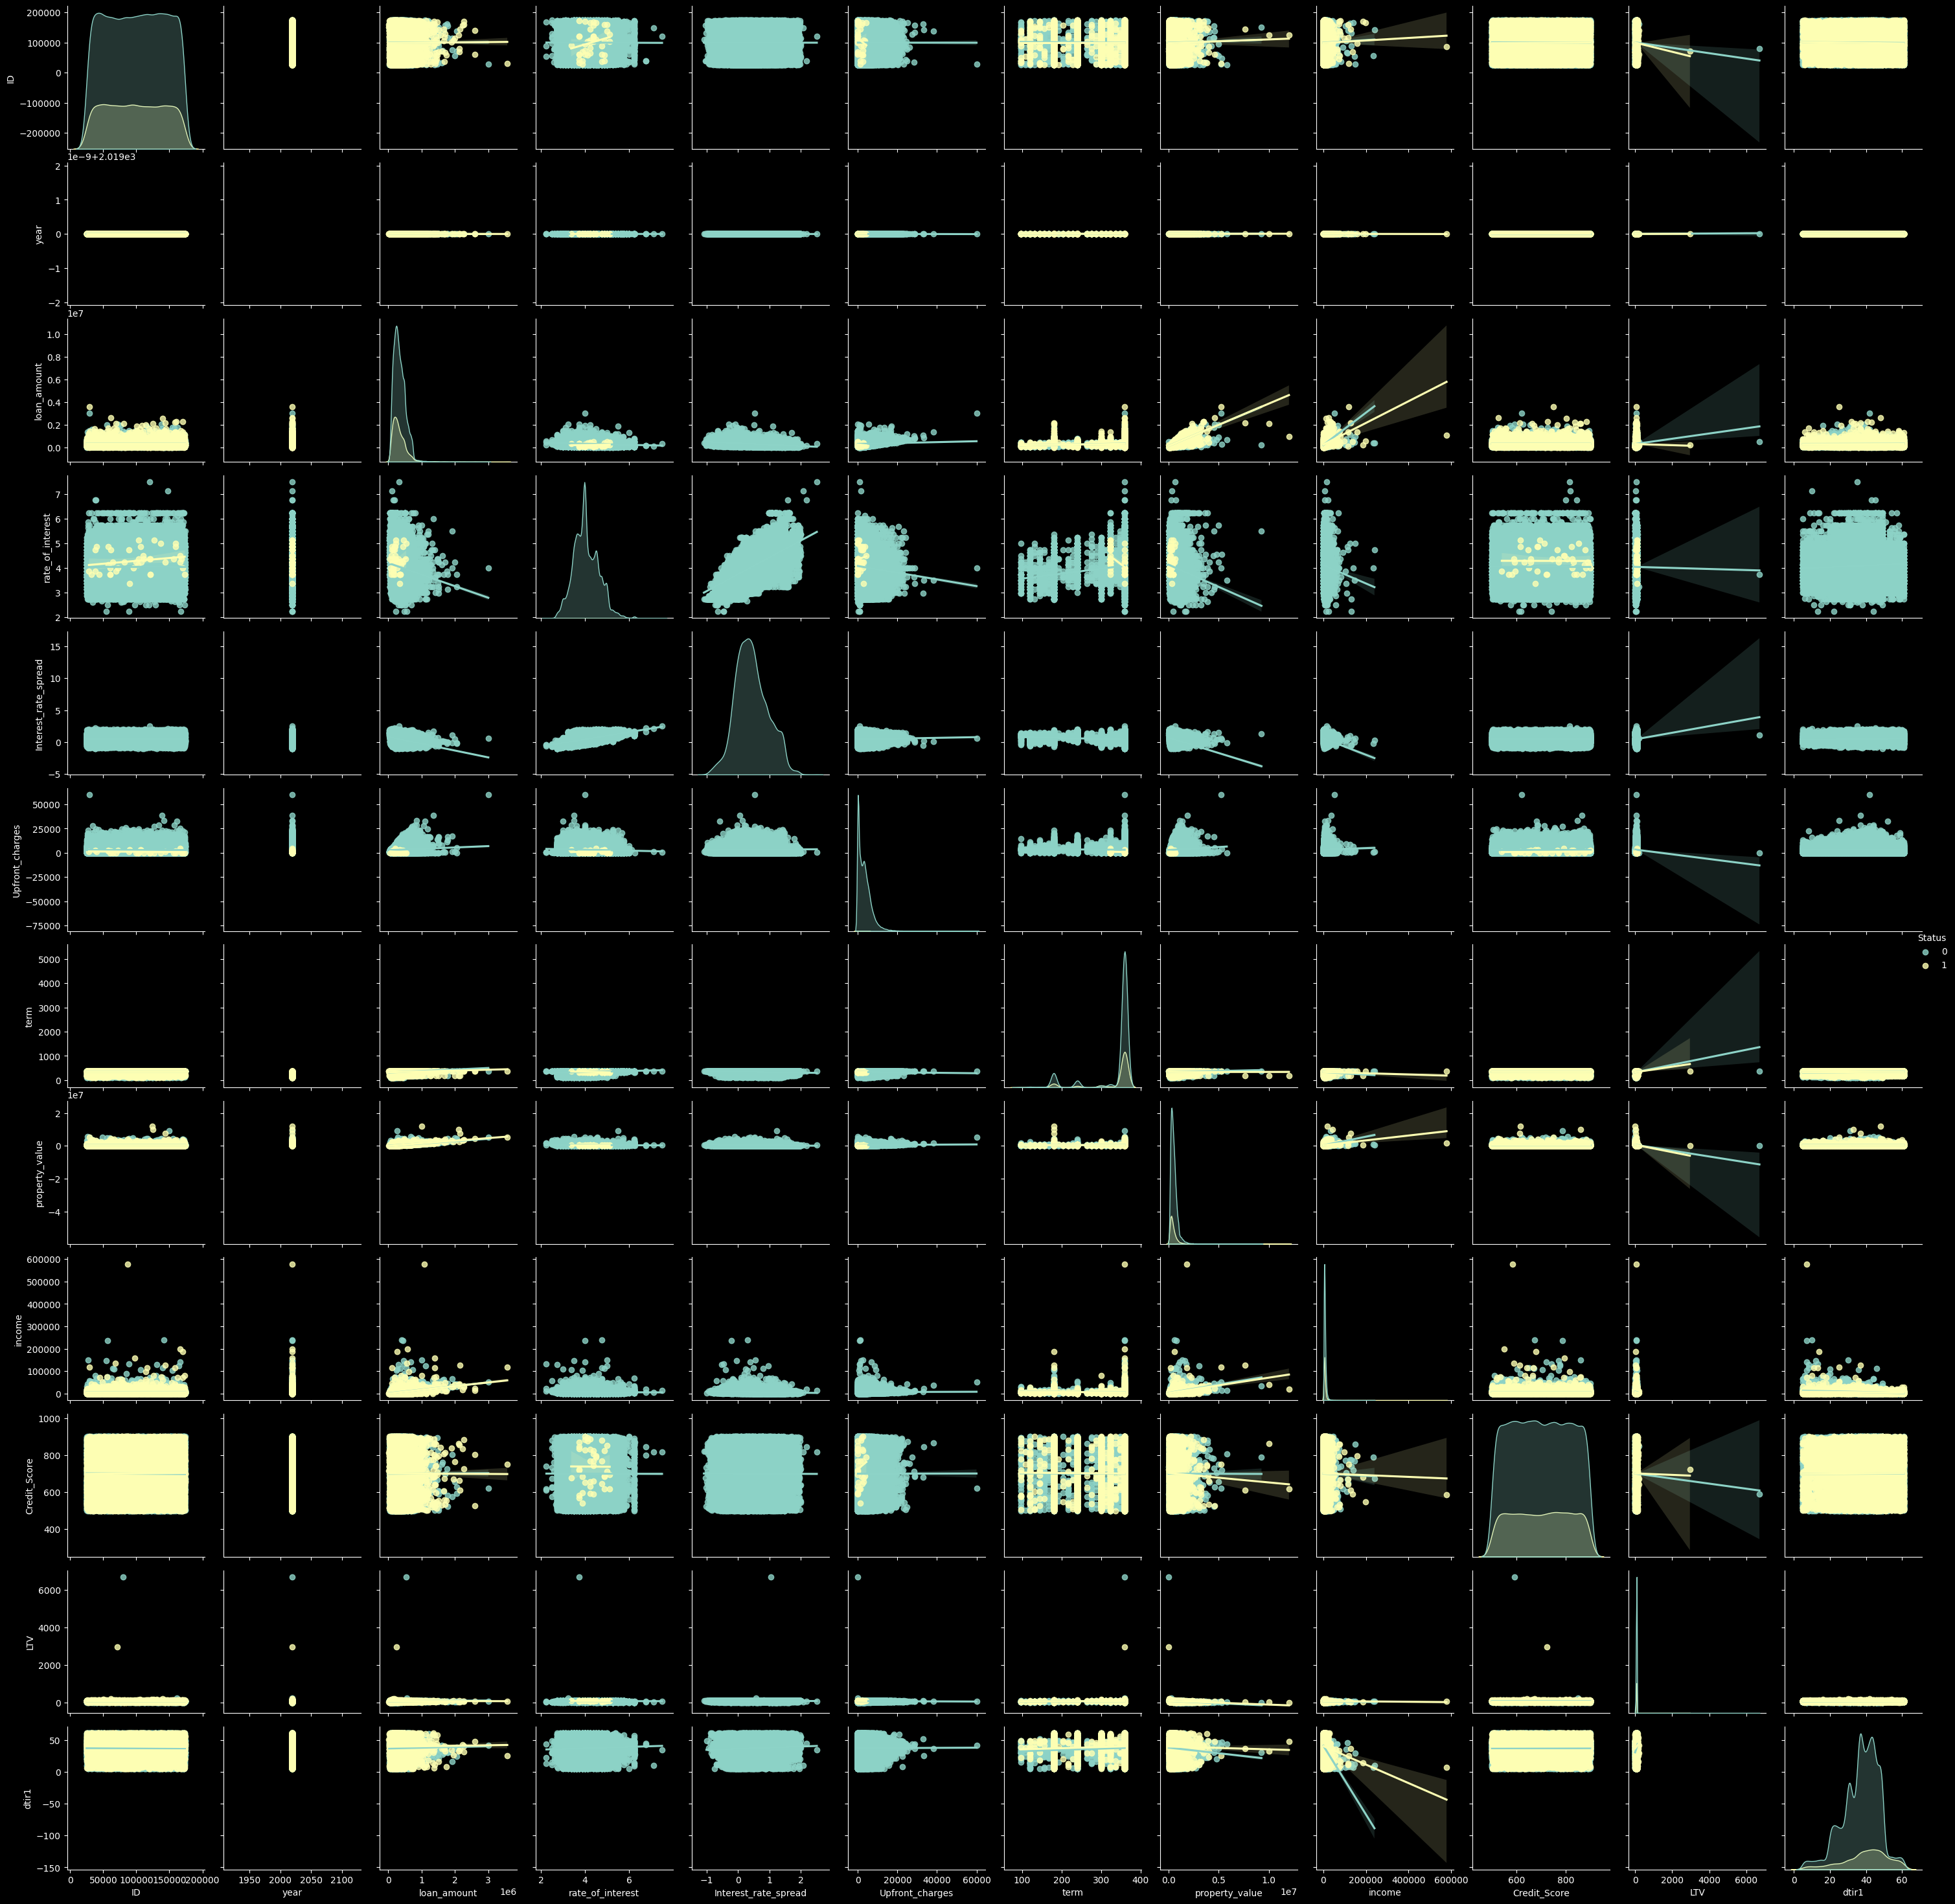

In [460]:
sns.pairplot(data=sampled_data, hue="Status",kind="reg")

In [ ]:
# Define a custom palette for Status
custom_palette = {
    1: "red",  # Loan Defaulted (Status = 1)
    0: "blue",  # Loan Not Defaulted (Status = 0)
}

# Loop through numeric columns and plot KDE for income vs Status
for col in sampled_data.select_dtypes(include="number").columns:
    if col != "Status":  # Exclude 'Status' itself
        plt.figure(figsize=(6, 4))  # Set figure size

        # Use sns.kdeplot for density estimation
        sns.kdeplot(
            data=sampled_data,
            x=col,  # Use each numeric column
            hue="Status",  # Color by Status
            palette=custom_palette,  # Explicit color assignment
            fill=True,  # Fill under the curve
            alpha=0.5,
        )

        # Set plot title and labels
        plt.title(f"Density Plot: {col} vs Loan Status")
        plt.xlabel(col)
        plt.ylabel("Density")

        # Display the legend
        plt.legend(title="Loan Status", labels=["Not Defaulted (0)", "Defaulted (1)"])
        plt.show()


<Axes: xlabel='count', ylabel='Gender'>

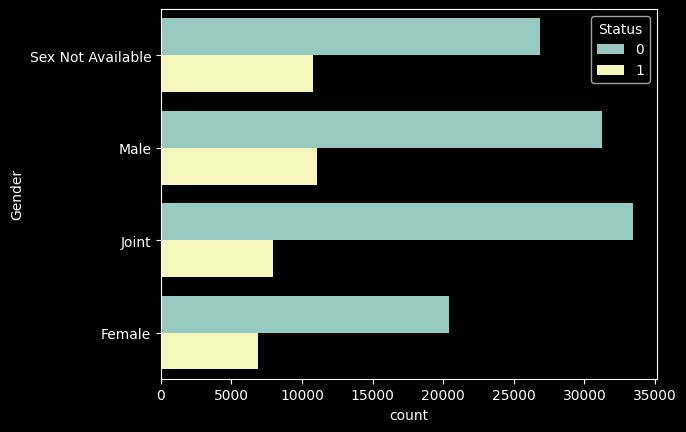

In [ ]:
sns.countplot(data=df, y="Gender", hue="Status")


In [ ]:
gender_status_counts = (
    df.groupby("Gender")["Status"].value_counts(normalize=True).unstack()
)

# Multiply by 100 to convert ratios to percentages
gender_status_percentages = gender_status_counts * 100

# Print the calculated ratios
print("Default/Not Default Ratios by Gender (%):")
print(round(gender_status_percentages, 2))

Default/Not Default Ratios by Gender (%):
Status                 0      1
Gender                         
Female             74.88  25.12
Joint              80.84  19.16
Male               73.81  26.19
Sex Not Available  71.41  28.59


In [ ]:
df[
    [
        "total_units",
        "income",
        "credit_type",
        "Credit_Score",
        "co-applicant_credit_type",
        "age",
        "submission_of_application",
        "LTV",
        "Region",
        "Security_Type",
    ]
].describe(include="all")


,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type
count,148670,139520.000000,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670
unique,4,NaN,4,NaN,2,7,2,NaN,4,2
top,1U,NaN,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct
freq,146480,NaN,48152,NaN,74392,34720,95814,NaN,74722,148637
mean,NaN,6957.338876,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN
std,NaN,6496.586382,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN
min,NaN,0.000000,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN
25%,NaN,3720.000000,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN
50%,NaN,5760.000000,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN
75%,NaN,8520.000000,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN


(0.0, 100000.0)

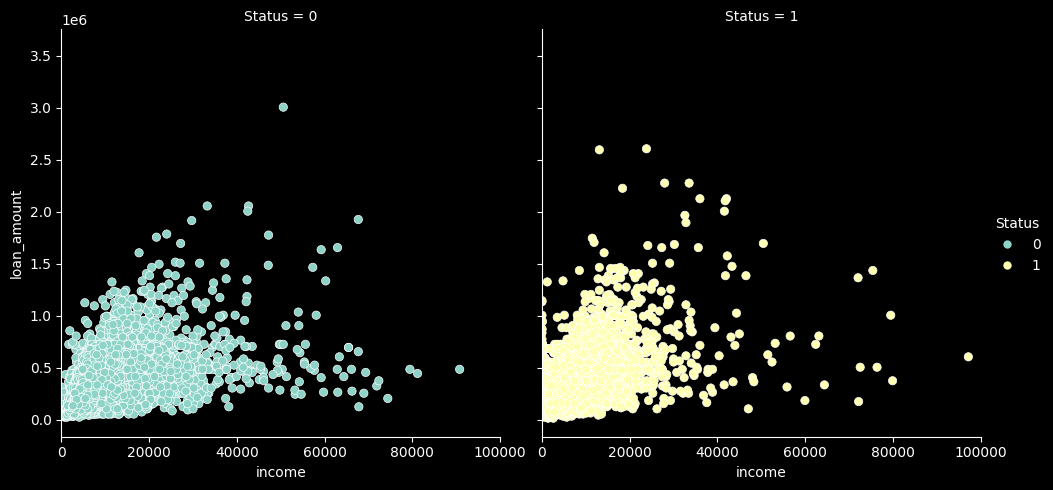

In [468]:
sns.relplot(
    data=sampled_data,
    y="loan_amount",
    x="income",
    hue="Status",
    kind="scatter",
    col="Status",
)
plt.xlim(0, 100000)

Default/Not Default Ratios by type (%):
Status      0      1
age                 
25-34   77.81  22.19
35-44   77.73  22.27
45-54   75.95  24.05
55-64   74.11  25.89
65-74   73.14  26.86
<25     71.05  28.95
>74     69.99  30.01


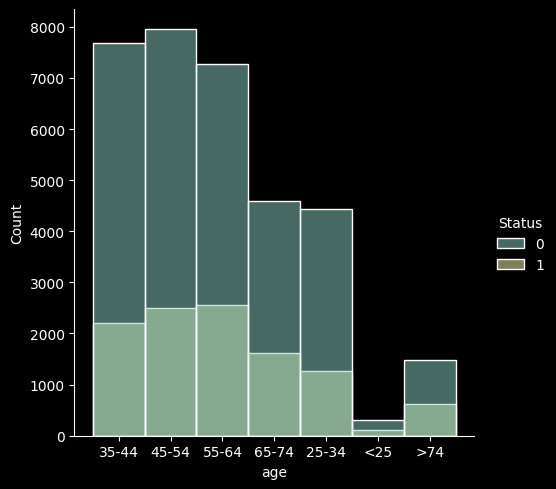

In [323]:
sns.displot(data=sampled_data, x="age", hue="Status")
gen_status_counts = df.groupby("age")["Status"].value_counts(normalize=True).unstack()

# Multiply by 100 to convert ratios to percentages
gen_status_counts = gen_status_counts * 100

# Print the calculated ratios
print("Default/Not Default Ratios by type (%):")
print(round(gen_status_counts, 2))

In [418]:

type = "LTV"


gen_status_counts = df.groupby(type)["Status"].value_counts(normalize=True).unstack()



# Multiply by 100 to convert ratios to percentages
gen_status_counts = gen_status_counts * 100

# Print the calculated ratios
print(f"Default/Not Default Ratios by {type} (%):")
print(round(gen_status_counts, 2))


Default/Not Default Ratios by LTV (%):
Status           0      1
LTV                      
0.967478       NaN  100.0
2.072943     100.0    NaN
2.767587     100.0    NaN
2.813745     100.0    NaN
2.856421     100.0    NaN
...            ...    ...
2956.250000    NaN  100.0
4706.250000  100.0    NaN
5206.250000  100.0    NaN
6706.250000  100.0    NaN
7831.250000  100.0    NaN

[8484 rows x 2 columns]


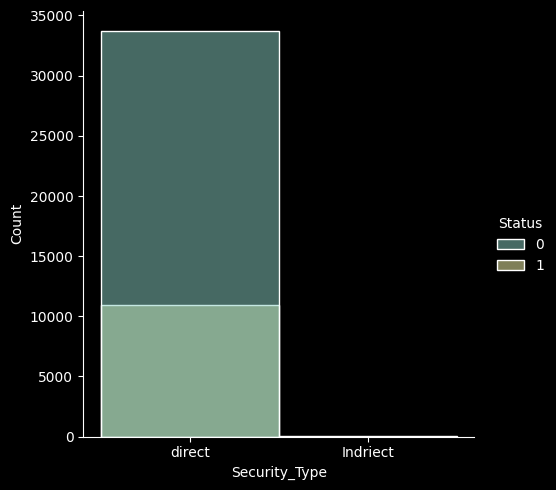

In [389]:
sns.displot(data=sampled_data, x="Security_Type",hue="Status")
# plt.xlim(0, 20000)


In [396]:
df["Security_Type"].value_counts()

Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

(0.0, 20000.0)

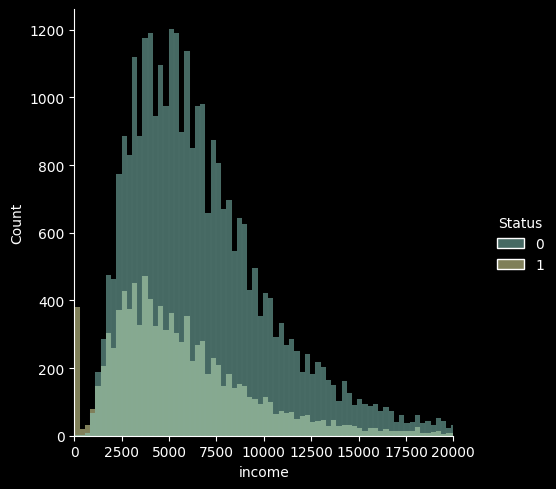

In [399]:
sns.displot(data=sampled_data,x="income",hue="Status")
plt.xlim(0,20000)

(0.0, 200.0)

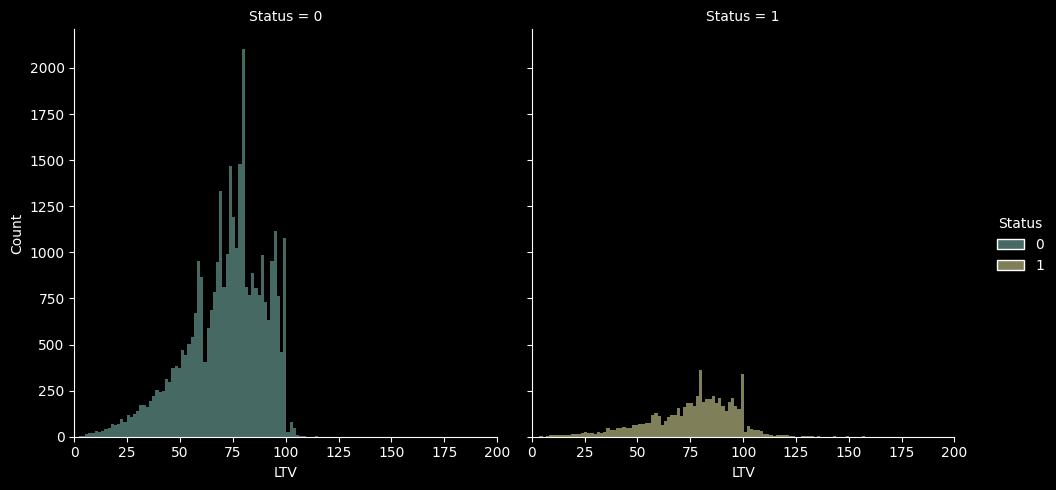

In [404]:
sns.displot(data=sampled_data,x="LTV",hue="Status",col="Status")
plt.xlim(0,200)

/Users/michalglinka/Desktop/projects/ML_intro_24-25/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


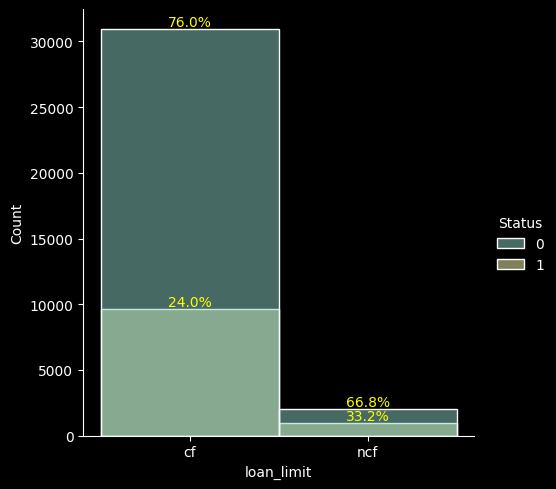

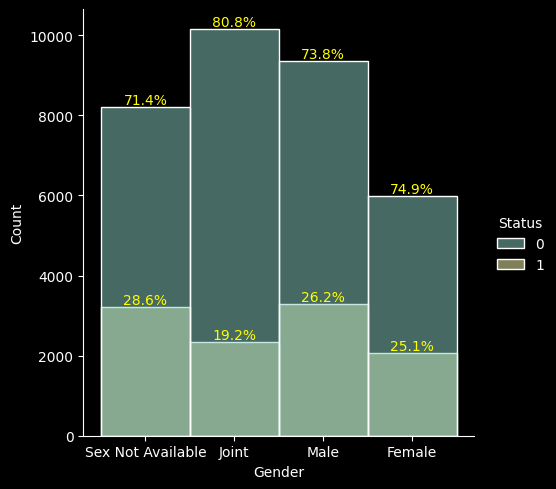

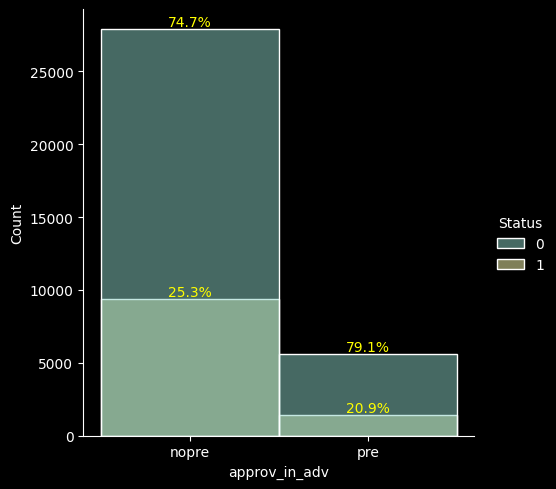

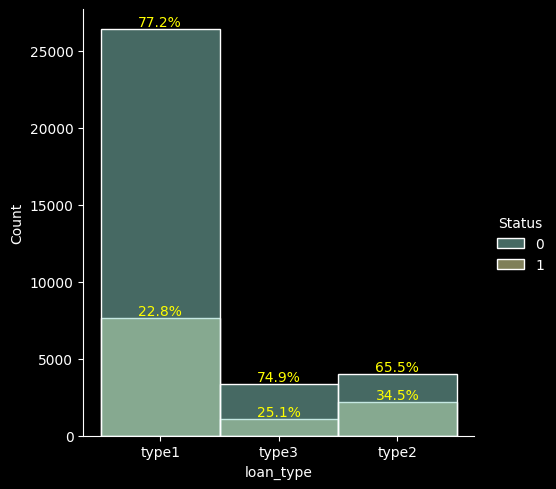

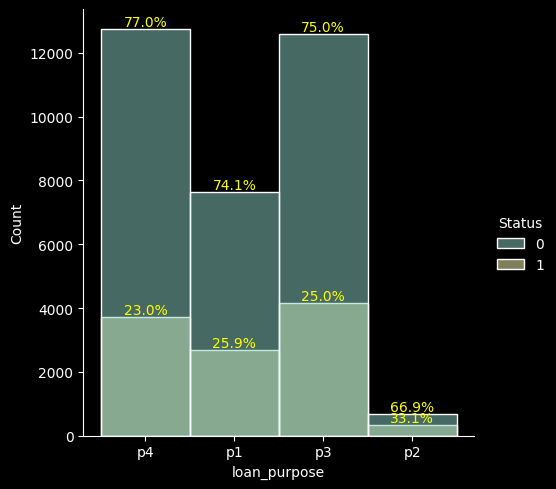

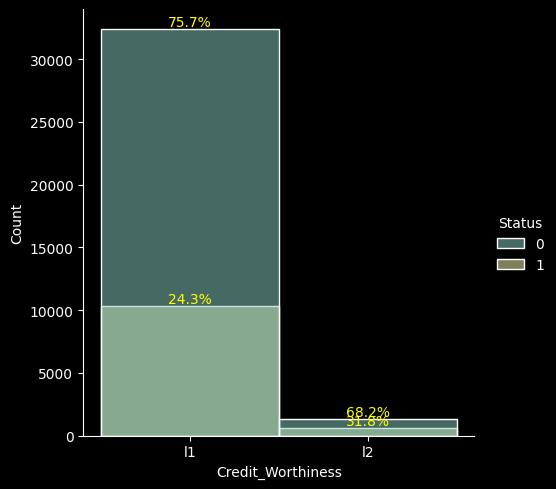

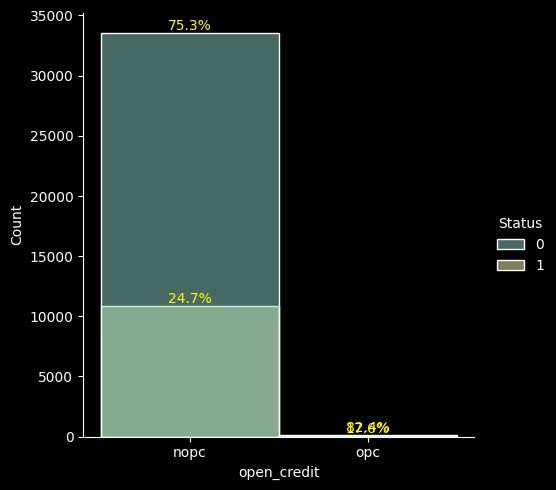

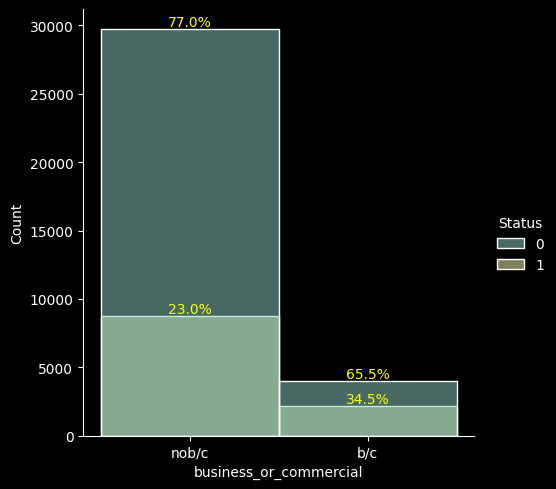

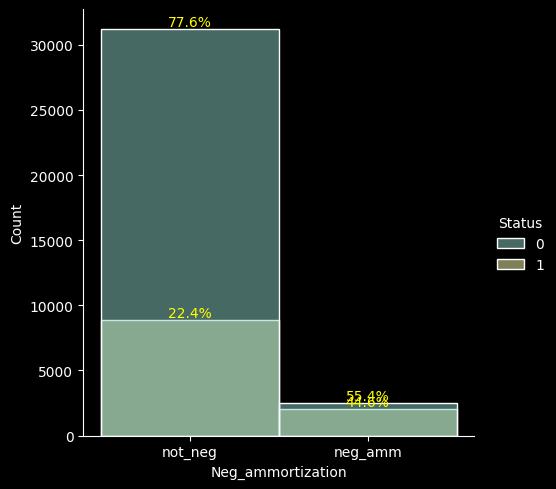

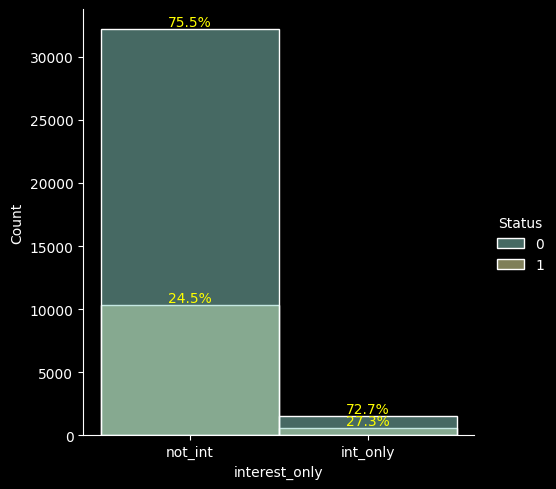

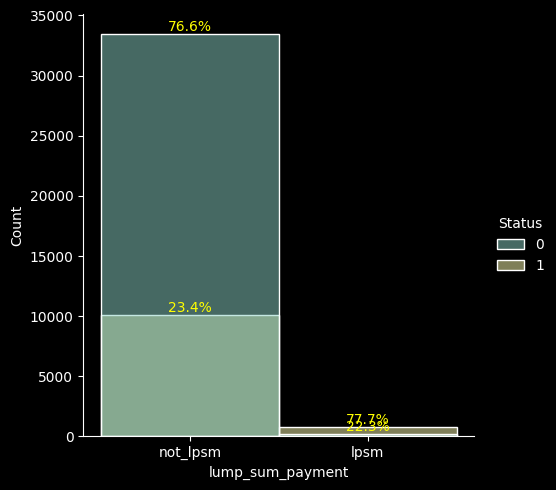

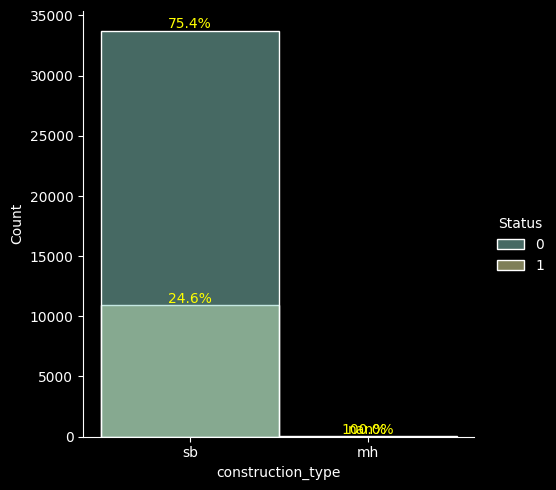

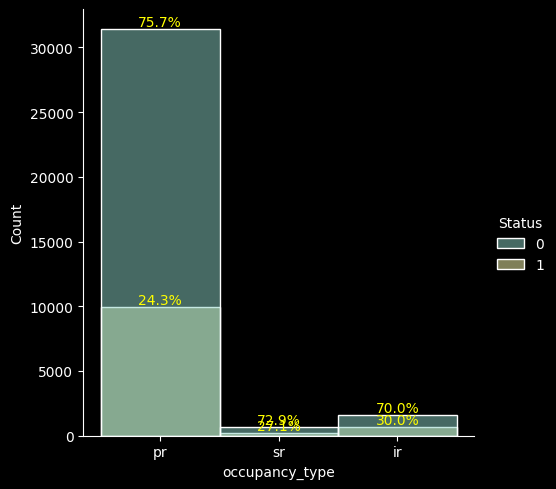

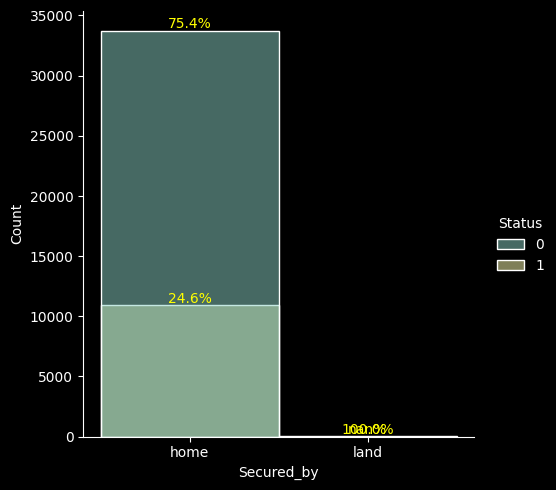

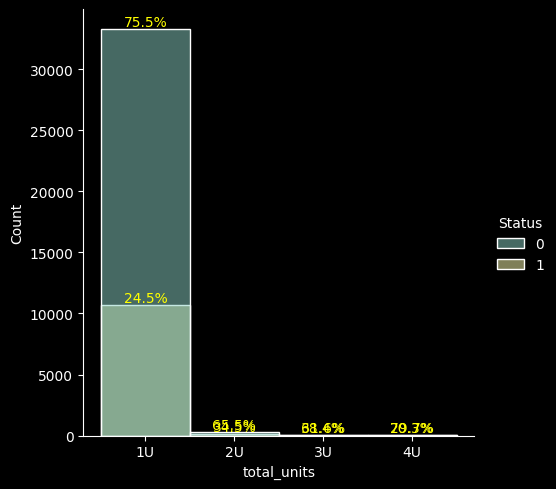

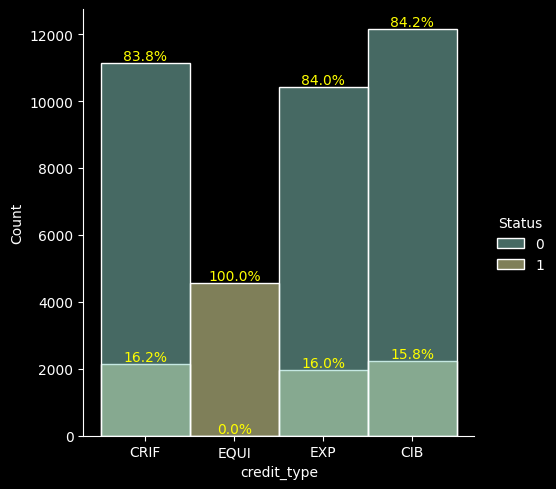

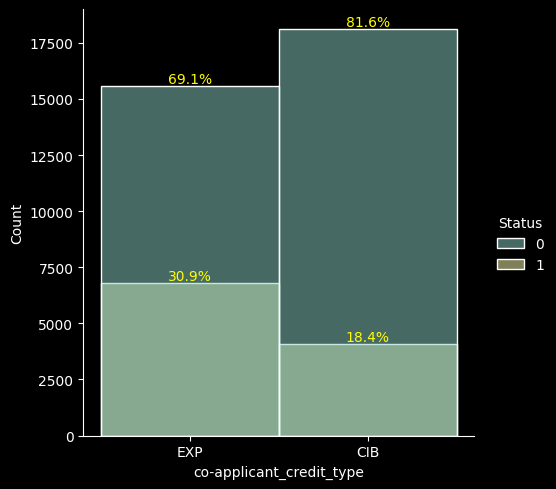

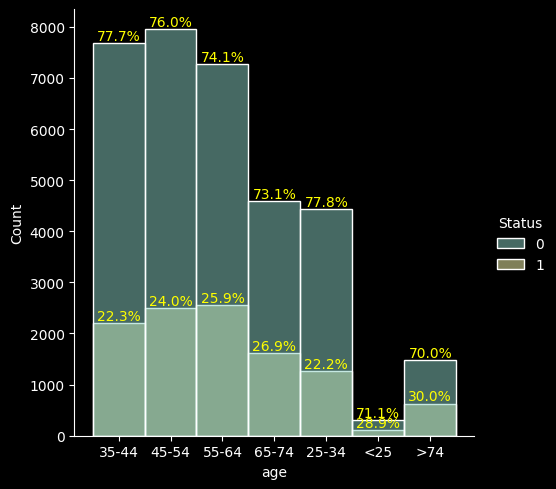

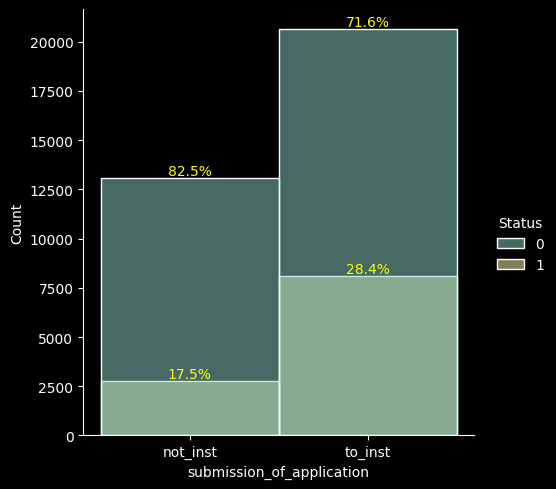

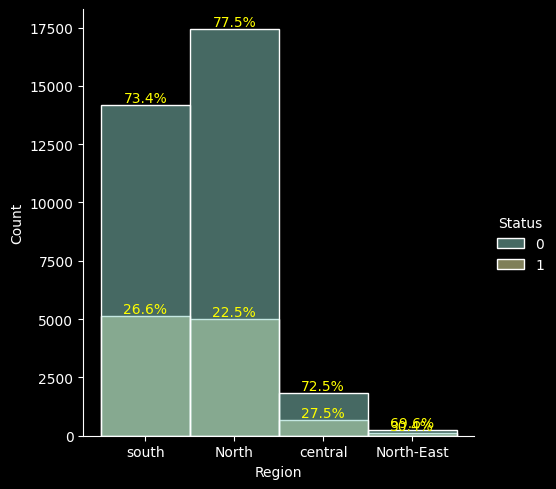

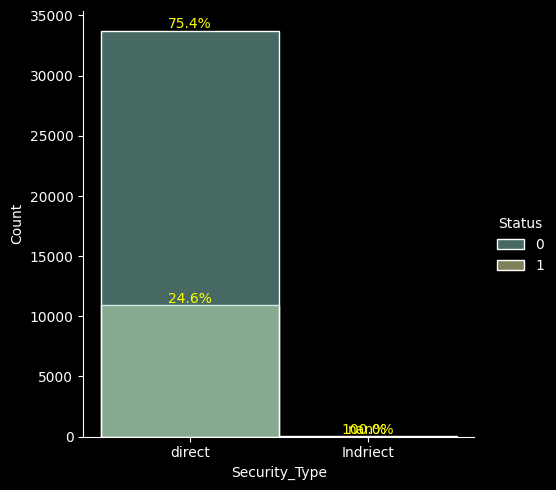

In [430]:
for data in sampled_data.select_dtypes(include="object"):
    sns.displot(data=sampled_data, x=data, hue="Status")
    gen_status_counts = (
        df.groupby(data)["Status"].value_counts(normalize=True).unstack()
    )

    # Multiply by 100 to convert ratios to percentages
    gen_status_counts = gen_status_counts * 100

    # Print the calculated ratios
    # print("Default/Not Default Ratios by type (%):")
    # print(f"{round(gen_status_counts, 2)}\n\n")

    for category in gen_status_counts.index:
        for status in gen_status_counts.columns:
            # Filter for specific category and status
            count = sampled_data[(sampled_data[data] == category) & (sampled_data["Status"] == status)].shape[0]
            percentage = gen_status_counts.loc[category, status]

            # Find the bar height for annotation
            bar_position = sampled_data[sampled_data[data] == category][data].iloc[0]
            plt.text(
                x=bar_position,
                y=count + 1,  # Adjust position above the bar
                s=f"{percentage:.2f}%",
                ha="center",
                va="bottom",
                fontsize=10,
                color="Yellow",
            )

In [443]:
df.head(20)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,income_bin
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,"(-578.581, 57858.0]"
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,"(-578.581, 57858.0]"
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,"(-578.581, 57858.0]"
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,"(-578.581, 57858.0]"
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,"(-578.581, 57858.0]"
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0,"(-578.581, 57858.0]"
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0,"(-578.581, 57858.0]"
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0,"(-578.581, 57858.0]"
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0,"(-578.581, 57858.0]"
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0,"(-578.581, 57858.0]"
